# Linear Regression Problem 02

### Problem: Predicting House Prices Based on Features

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Create Dataset**

In [15]:
np.random.seed(42)

In [16]:
n_samples = 100  # Number of data points
size = np.random.randint(800, 4000, n_samples)        # House size between 800 and 4000 sqft
bedrooms = np.random.randint(1, 6, n_samples)         # Bedrooms between 1 and 5
bathrooms = np.random.randint(1, 4, n_samples)        # Bathrooms between 1 and 3
price = (size * 0.3) + (bedrooms * 50) + (bathrooms * 70) + np.random.randint(10000, 50000, n_samples)

In [17]:
house_data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': price / 1000  # Dividing by 1000 to represent price in thousands
})

print(house_data.head())

   Size  Bedrooms  Bathrooms    Price
0  3974         4          1  16.1972
1  1660         5          1  15.3730
2  2094         1          3  30.7182
3  1930         5          1  28.3280
4  1895         5          2  17.8515


**Data Preparation**

In [18]:
X = house_data[['Size', 'Bedrooms', 'Bathrooms']]  # Features
y = house_data['Price']  # Target variable (Price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Linear Regression Model**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

**Evaluate the Model**

In [20]:
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Mean Squared Error: 153.8173336322403
R-squared Score: 0.004552773284782763


In [21]:
# Coefficients of the model
print("Coefficients (Size, Bedrooms, Bathrooms):", model.coef_)
print("Intercept:", model.intercept_)

Coefficients (Size, Bedrooms, Bathrooms): [1.01122682e-03 6.40971921e-01 4.48709450e+00]
Intercept: 16.469267328206


**Plot the Graph**

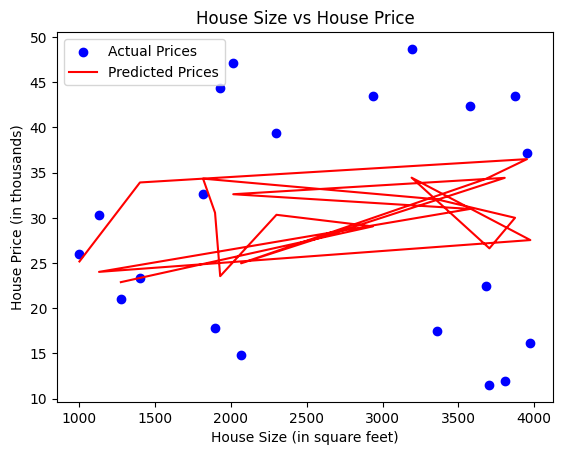

In [22]:
plt.scatter(X_test['Size'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['Size'], model.predict(X_test), color='red', label='Predicted Prices')

plt.title('House Size vs House Price')
plt.xlabel('House Size (in square feet)')
plt.ylabel('House Price (in thousands)')
plt.legend()
plt.show()

In [23]:
# Displaying first few predicted and actual prices
print("Predicted prices (first 5):", y_pred[:5])
print("Actual prices (first 5):", y_test[:5].values)

Predicted prices (first 5): [25.17345948 33.91015606 36.4908069  34.29182621 24.96948342]
Actual prices (first 5): [25.9583 23.363  37.1426 22.4567 14.8541]
